In [23]:
%matplotlib inline
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pymongo import MongoClient
#client = MongoClient('mongodb://server.mcgarity.info:27017')
client = MongoClient()  # use local database by default
db = client["borg_wingo"]
collectionNames = sorted(db.collection_names())
collectionNames

[u'y16m01d28_testing',
 u'y16m01d29_100_max',
 u'y16m01d29_100_max1',
 u'y16m01d29_300_1',
 u'y16m01d29_4000',
 u'y16m01d29_4000_1',
 u'y16m01d29_4000_max',
 u'y16m01d29_5000_max']

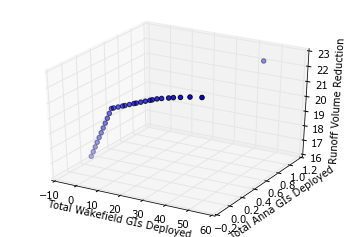

In [24]:
runs = db['y16m01d29_4000_1']
cursor = runs.find()
ndocs = runs.count()
last = cursor.count()-1  # Pareto solution is in the last record
paretoDict = cursor[last]  # get the Pareto Solution

wakefieldTotalList = []
annaTotalList = []
volReductionList = []
numParetoPoints = len(paretoDict)
for i in range(1,numParetoPoints):
    key = str(i)   # must store mongoDB keys as strings !!
    paretoPointList = paretoDict[key]
    objList = paretoPointList[1]
    #print objList
    wakefieldTotalList.append(objList[0])
    annaTotalList.append(objList[1])
    volReductionList.append(-objList[2]) # restore to maximization
#print volReductionList
xs = np.array(wakefieldTotalList)
ys = np.array(annaTotalList)
zs = np.array(volReductionList)
#plt.plot(annaTotalList,volReductionList, 'o')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, zdir='z', s=20, c='b')
#ax.plot_wireframe(xs,ys,zs,rstride=10, cstride=10)
ax.set_xlabel("Total Wakefield GIs Deployed",fontsize=10)
#plt.ylabel("Sewer Outflow Reduction (MGal/yr)",fontsize=10)

ax.set_ylabel("Total Anna GIs Deployed",fontsize=10)
ax.set_zlabel("Runoff Volume Reduction",fontsize=10)
plt.show()

In [26]:
runs = db['y16m01d29_4000_1']
cursor = runs.find()
ndocs = runs.count()
#last = cursor.count()-1  # Pareto solution is in the last record
#paretoDict = cursor[last]  # get the Pareto Solution
runNum = 1
runDict = cursor[runNum]
runDict

{u'_id': ObjectId('56ab88711a5e8309c1165068'),
 u'lidDict': {u'S1 Anna_TT_infil': {u'Continuity Error': 5.04,
   u'Drain Outflow': 0.0,
   u'Evap Loss': 2.4,
   u'Final Storage': 0.0,
   u'Infil Loss': 1424.87,
   u'Initial Storage': 0.0,
   u'Surface Outflow': 613.03,
   u'Total Inflow': 2148.48},
  u'S1 wakefield_BR_RG': {u'Continuity Error': -0.01,
   u'Drain Outflow': 0.0,
   u'Evap Loss': 19.41,
   u'Final Storage': 0.5,
   u'Infil Loss': 776.68,
   u'Initial Storage': 0.3,
   u'Surface Outflow': 1324.71,
   u'Total Inflow': 2120.83},
  u'S2 Anna_TT_infil': {u'Continuity Error': 0.48,
   u'Drain Outflow': 0.0,
   u'Evap Loss': 1.16,
   u'Final Storage': 0.0,
   u'Infil Loss': 700.46,
   u'Initial Storage': 0.0,
   u'Surface Outflow': 19.55,
   u'Total Inflow': 724.62},
  u'S2 wakefield_BR_RG': {u'Continuity Error': -0.02,
   u'Drain Outflow': 0.0,
   u'Evap Loss': 17.73,
   u'Final Storage': 0.5,
   u'Infil Loss': 532.45,
   u'Initial Storage': 0.3,
   u'Surface Outflow': 169.31,
